# Exploratory Data Analysis (EDA)

## 0. Preparation

In [84]:
# Install necessary libraries/packages 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# read data from csv to pandas dataframe
file_path = '../data/CreditCardData.csv'
df_data = pd.read_csv(file_path)

df_data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


## 1. Analysis

### 1.1. Data information

In [86]:
# data dimension
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]

print(f'''
Data Dimension

Total number of rows: {num_rows}
Total number of cols: {num_cols}
''')


Data Dimension

Total number of rows: 100000
Total number of cols: 16



In [87]:
# data type
df_data.dtypes

Transaction ID             object
Date                       object
Day of Week                object
Time                        int64
Type of Card               object
Entry Mode                 object
Amount                     object
Type of Transaction        object
Merchant Group             object
Country of Transaction     object
Shipping Address           object
Country of Residence       object
Gender                     object
Age                       float64
Bank                       object
Fraud                       int64
dtype: object

In [88]:
# modified typo values
df_data['Bank'] = df_data['Bank'].replace('Barlcays', 'Barclays')

### 1.2. Missing Data


Missing Percentage per Column

Merchant Group            0.010
Amount                    0.006
Shipping Address          0.005
Gender                    0.004
Time                      0.000
Transaction ID            0.000
Day of Week               0.000
Date                      0.000
Type of Transaction       0.000
Entry Mode                0.000
Type of Card              0.000
Country of Transaction    0.000
Country of Residence      0.000
Age                       0.000
Bank                      0.000
Fraud                     0.000
dtype: float64



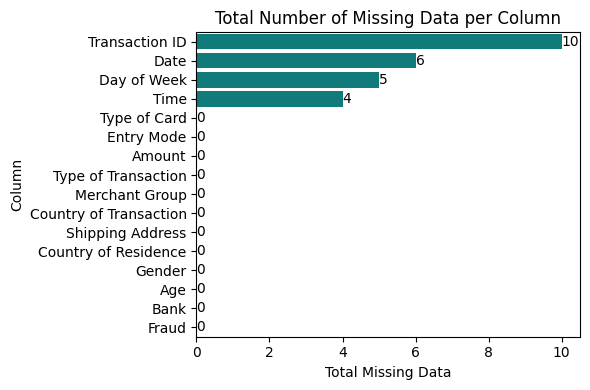

In [89]:
# Total missing data per column/feature
total_missing_data = df_data.isnull().sum()
missing_perc = total_missing_data / df_data.shape[0] * 100

print(f'''
Missing Percentage per Column

{missing_perc.sort_values(ascending=False)}
''')

# Barchart
plt.figure(figsize=(6,4))
ax = sns.barplot(y=df_data.columns, x=total_missing_data.sort_values(ascending=False), color='darkcyan')
ax.bar_label(ax.containers[0])
plt.xlabel('Total Missing Data')
plt.ylabel('Column')
plt.title('Total Number of Missing Data per Column')
plt.tight_layout()

plt.show()

Based on the chart above, the `total missing data` is minimal, with a maximum of 10 missing entries in the `Merchant Group` column. The percentage of missing data is also insignificant; therefore, these missing data points will be excluded from the analysis.

In [90]:
# drop missing data
df_data.dropna(inplace=True)

### 1.3. Fraud data (target data)


Total Number of Transaction

Normal Transaction: 92785
Fraud Transaction:  7192



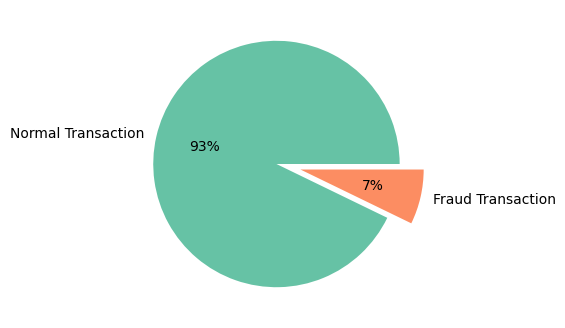

In [91]:
# total number normal transaction and fraud transaction in dataset 
# 0 --> Normal Transaction | 1 --> Fraud Transaction
df_data['Fraud'].value_counts()

print(f'''
Total Number of Transaction

Normal Transaction: {df_data['Fraud'].value_counts()[0]}
Fraud Transaction:  {df_data['Fraud'].value_counts()[1]}
''')
# piechart
plt.figure(figsize=(5,4))
ax = plt.pie(x = df_data['Fraud'].value_counts(),
             labels = ['Normal Transaction', 'Fraud Transaction'], 
             colors = sns.color_palette("Set2"),
             explode=[0, 0.2],
             autopct='%.0f%%')
plt.show()

#### 1.3.1. Personal Category

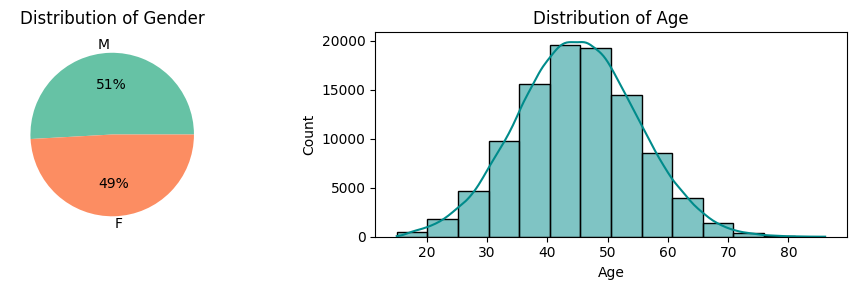

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))

ax[0].pie(x = df_data['Gender'].value_counts(),labels = df_data['Gender'].unique(),colors = sns.color_palette("Set2"), autopct='%.0f%%')
ax[0].set_title(f'Distribution of Gender')

ax[1] = sns.histplot(x = df_data['Age'], binwidth =  5, color='darkcyan', kde=True)
ax[1].set_title(f'Distribution of Age')

plt.tight_layout()
plt.show()

#### 1.3.2. Time dimension of target value

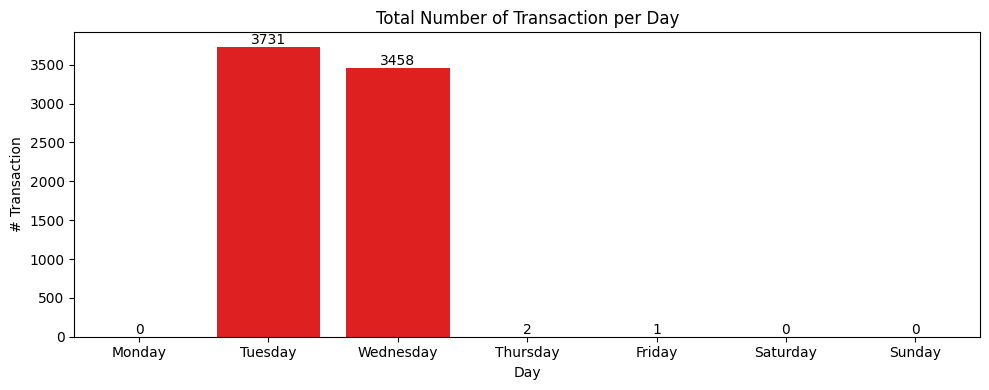

In [93]:
# Day
sr_day = df_data.loc[df_data['Fraud'] == 1]['Day of Week'].value_counts()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sr_day_data = dict()
for day in days:
    sr_day_data[day] = 0
for i,val in enumerate(sr_day):
    sr_day_data[sr_day.index[i]] = val

# Barchart
plt.figure(figsize=(10,4))
ax = sns.barplot(x=sr_day_data.keys(), y=sr_day_data.values(), color='red')
ax.bar_label(ax.containers[0])
plt.xlabel('Day')
plt.ylabel('# Transaction')
plt.title('Total Number of Transaction per Day')
plt.tight_layout()
plt.show()

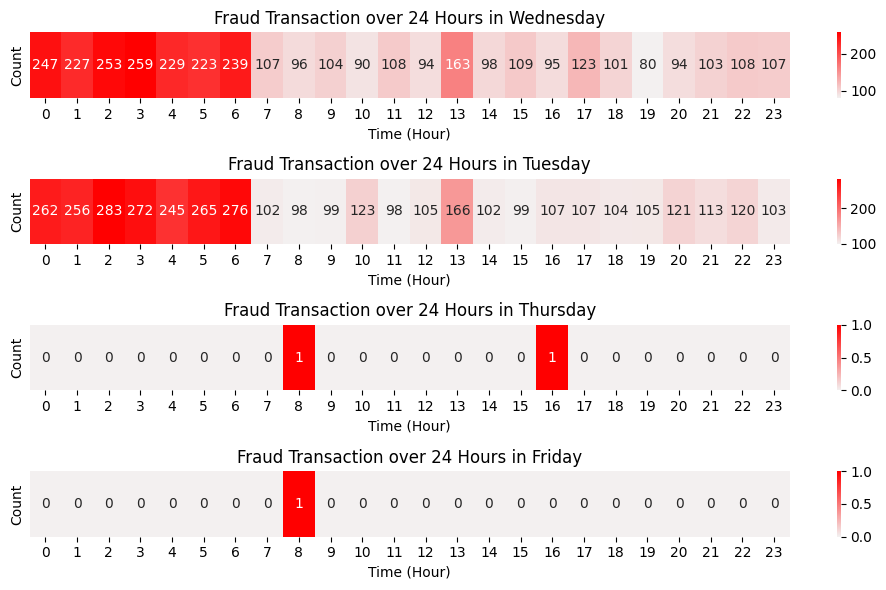

In [94]:
# Time
fig, ax = plt.subplots(len(df_data['Day of Week'].unique()), 1, figsize=(10,6))

for i, day in enumerate(df_data['Day of Week'].unique()):
    sr_time = df_data.loc[(df_data['Fraud'] == 1) & (df_data['Day of Week'] == day)].groupby(['Time'])['Time'].count()
    df_sr_time = pd.DataFrame(sr_time.reset_index(name='Count')).set_index('Time').reindex(pd.Index(range(24), name='Time'), fill_value=0).transpose()
    ax[i] = sns.heatmap(ax=ax[i], data = df_sr_time, annot=True, fmt="d", cmap=sns.light_palette("red", as_cmap=True), cbar=True, xticklabels=1, yticklabels=[])
    ax[i].set_title(f'Fraud Transaction over 24 Hours in {day}')
    ax[i].set_xlabel('Time (Hour)')
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### 1.3.3. Location dimension of target value

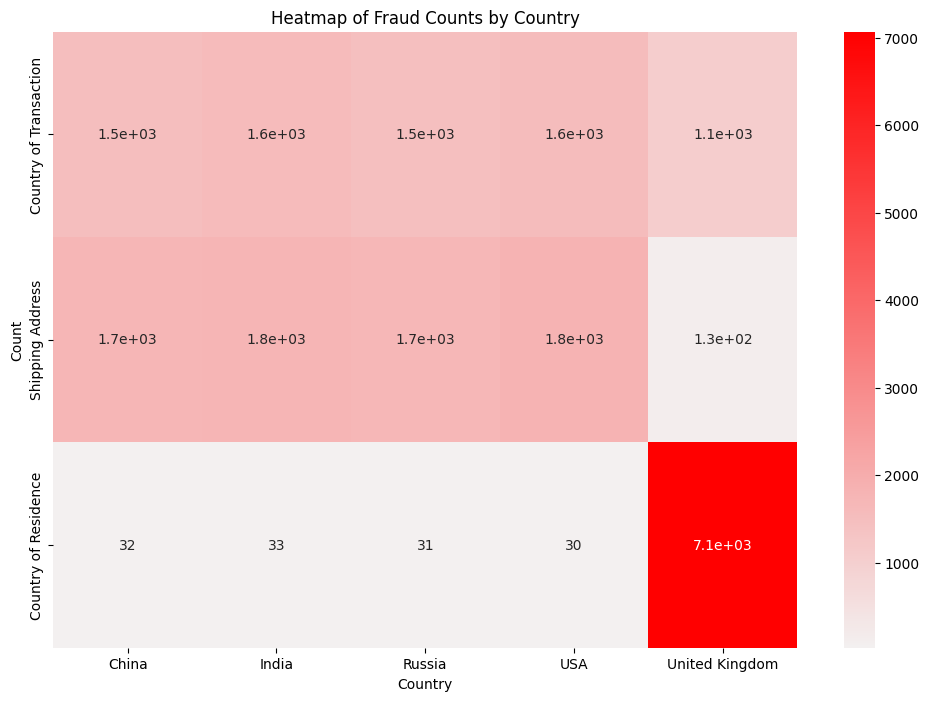

In [95]:
country_transaction_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Country of Transaction')['Country of Transaction'].count()
shipping_address_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Shipping Address')['Shipping Address'].count()
country_residence_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Country of Residence')['Country of Residence'].count()

combined_data = pd.DataFrame({'Country of Transaction': country_transaction_counts,
                          'Shipping Address': shipping_address_counts,
                          'Country of Residence': country_residence_counts}).fillna(0)

combined_data = combined_data.T

plt.figure(figsize=(12, 8))
sns.heatmap(combined_data, annot=True, cmap=sns.light_palette("red", as_cmap=True), cbar=True)
plt.title('Heatmap of Fraud Counts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### 1.3.4. Others categories

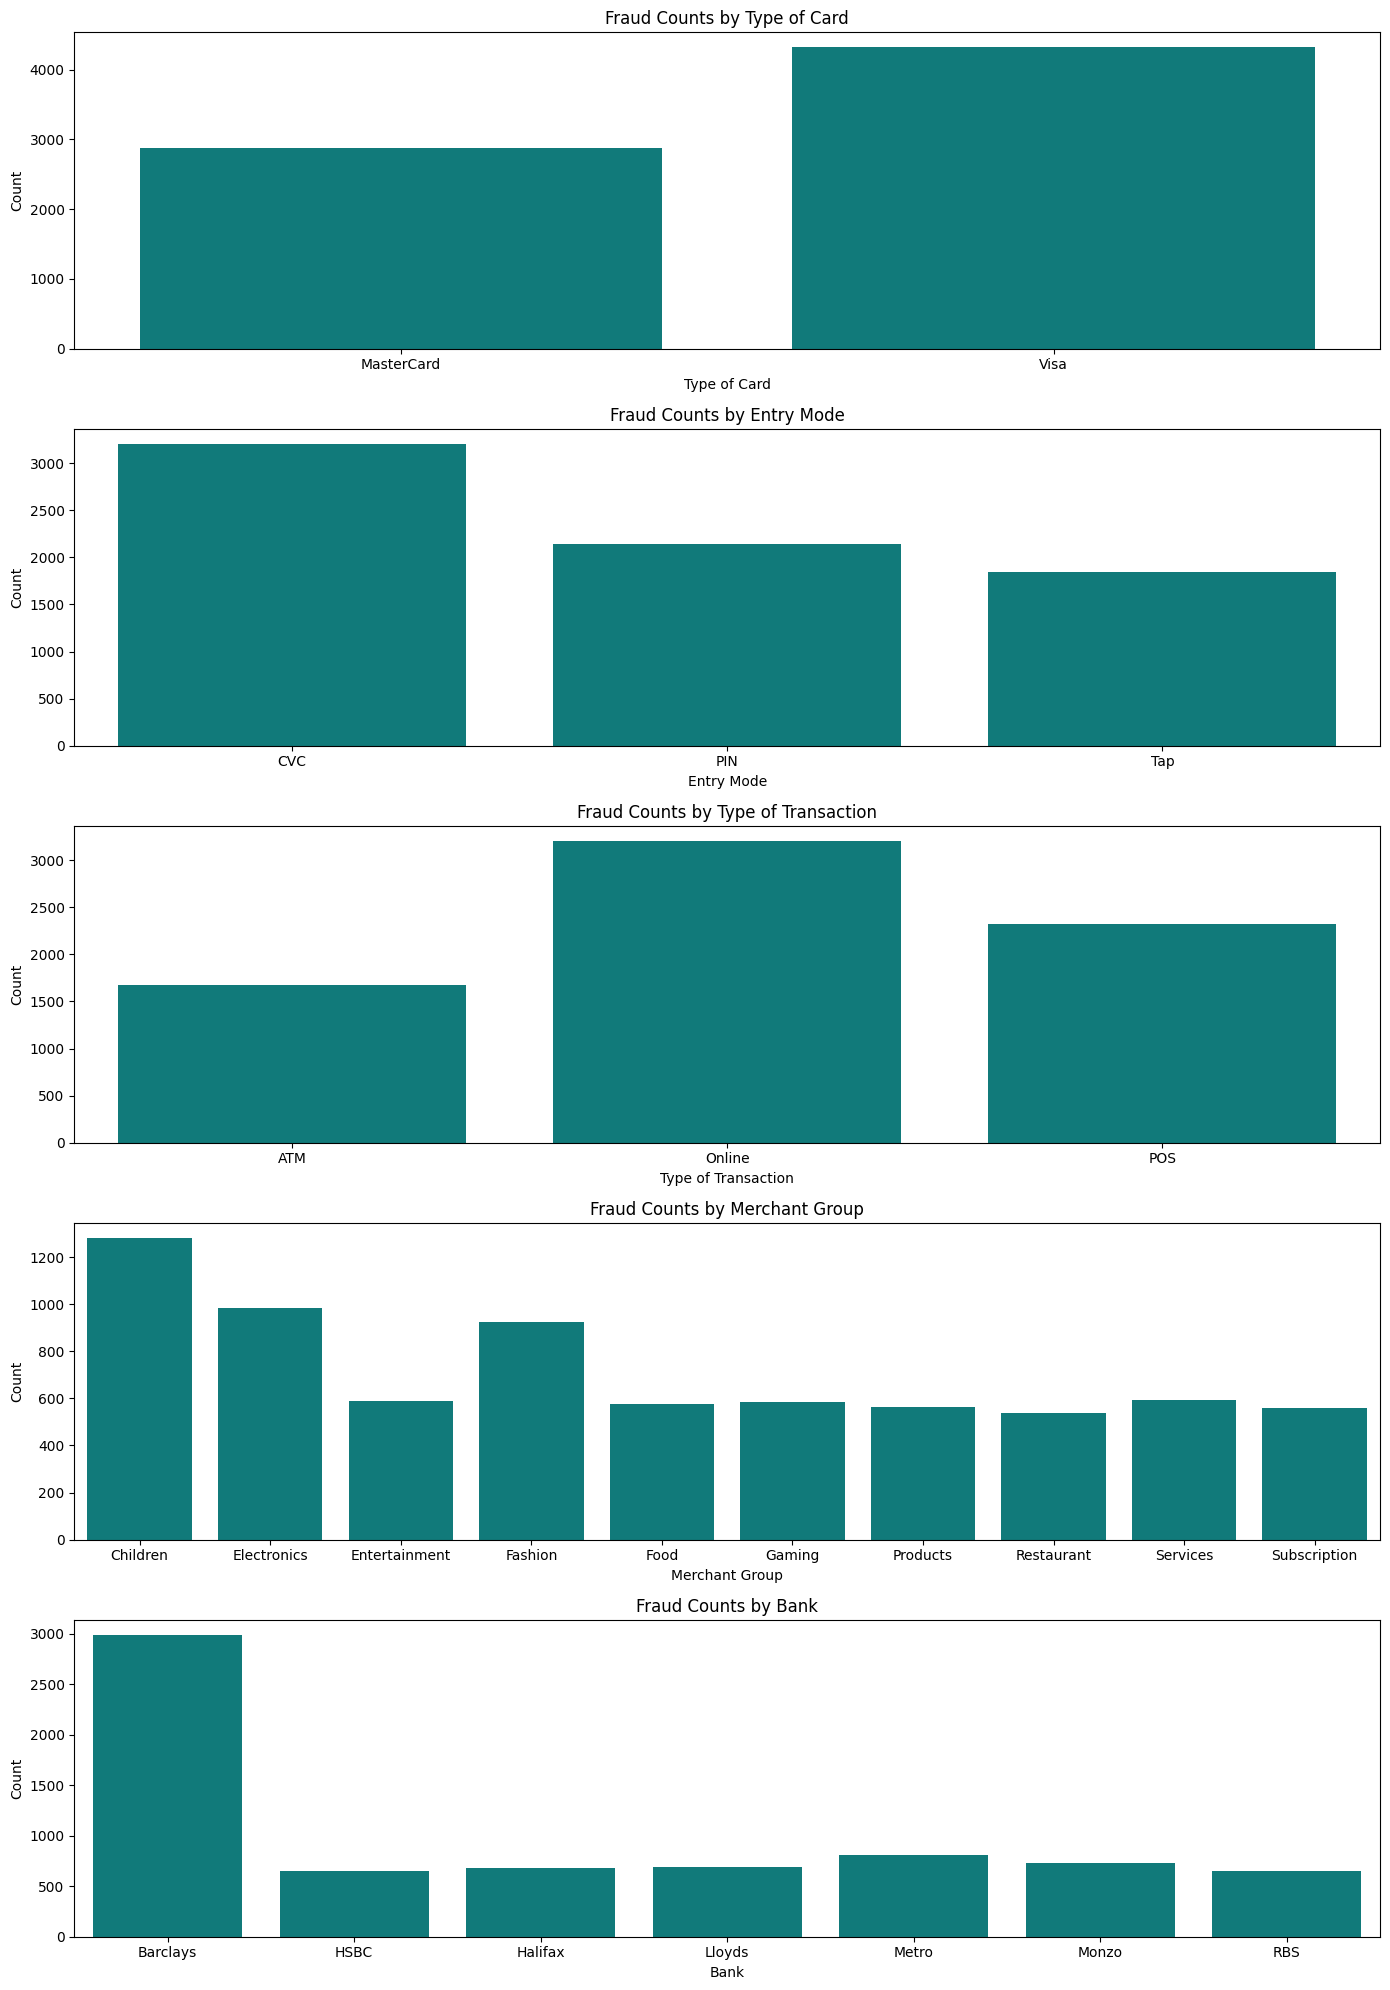

In [96]:
type_of_card_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Type of Card')['Type of Card'].count().reset_index(name='Count')
entry_mode_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Entry Mode')['Entry Mode'].count().reset_index(name='Count')
type_of_transaction_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Type of Transaction')['Type of Transaction'].count().reset_index(name='Count')
merchant_group_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Merchant Group')['Merchant Group'].count().reset_index(name='Count')
bank_counts = df_data.loc[df_data['Fraud'] == 1].groupby('Bank')['Bank'].count().reset_index(name='Count')

data_list = [
    (type_of_card_counts, 'Type of Card', 'Type of Card'),
    (entry_mode_counts, 'Entry Mode', 'Entry Mode'),
    (type_of_transaction_counts, 'Type of Transaction', 'Type of Transaction'),
    (merchant_group_counts, 'Merchant Group', 'Merchant Group'),
    (bank_counts, 'Bank', 'Bank'),   
]

fig, ax = plt.subplots(5, 1, figsize=(14,20))
for i, (data, title, xlabel) in enumerate(data_list):
    sns.barplot(x=data.columns[0], y='Count', data=data, ax=ax[i], color='darkcyan')
    ax[i].set_title(f'Fraud Counts by {title}')
    ax[i].set_xlabel(xlabel)
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()